<a href="https://colab.research.google.com/github/yeshwanthnarige/MACHINE-LEARNING-PROJECTS-/blob/master/Handwritting_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
# mnist contain data for Handwritting
minst=tf.keras.datasets.mnist

In [19]:
#spiltting the data for training and testing
(train_images,train_labels),(test_images,test_labels)=minst.load_data()

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

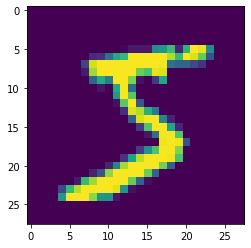

In [20]:
# just observe the first image of train_images
plt.imshow(train_images[0])
print(train_labels[0])
print(train_images[0])


In [22]:
print(test_images.shape)
train_images.shape

(10000, 28, 28)


(60000, 28, 28)

In [23]:
# tf works better for normalized values
train_images=train_images/255.0
test_images=test_images/255.0

In [26]:
#creating model
model=tf.keras.Sequential([
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(120, activation=tf.nn.relu),
                           tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [29]:
class mycallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            if (logs.get('accuracy')>0.99):
                print("\nReached 99% accuracy cancelling training!")
                self.model.stop_training= True
callbacks= mycallback()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_images,train_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1184 - accuracy: 0.9646
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0791 - accuracy: 0.9760
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0599 - accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0466 - accuracy: 0.9859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0364 - accuracy: 0.9884
Epoch 6/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.0297 - accuracy: 0.9906
Reached 99% accuracy cancelling training!
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0297 - accuracy: 0.9907
